# Import relevant Python Libraries

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Display Versions of Libraries to be Used

In [2]:
print(f'Tensorflow version: {tf.__version__}')
print(f'Pandas version: {pd.__version__}')
print(f'numpy version: {np.__version__}')
print(f'Scikit learn version: {sk.__version__}')

Tensorflow version: 2.16.1
Pandas version: 2.1.1
numpy version: 1.26.0
Scikit learn version: 1.3.2


#                            Data Loading, Cleaning and Preprocessing

In [6]:
#Load and read file(.csv) from local directory into a pandas dataframe
file_path = 'API_SE.XPD.TOTL.GD.ZS_DS2_en_csv_v2_247510.csv'
df = pd.read_csv(file_path)

In [7]:
# preview the dataset

df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.85084,5.887830,5.491060,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4.71730,4.743500,4.692000,4.820445,4.739750,4.541950,4.352440,4.632255,3.906225,NaN
2,Afghanistan,AFG,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,3.69522,3.255800,4.543970,4.343190,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.91423,3.195421,2.899100,3.535590,3.071543,3.100235,3.403950,3.282970,2.928443,NaN
4,Angola,AGO,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.93000,3.100000,2.754937,2.466879,2.044701,2.073064,2.744997,2.297109,2.332126,NaN


In [8]:
# briefly explore the dataset

df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,206.000000,212.000000,209.000000,214.000000,207.000000,203.000000,202.000000,190.000000,114.000000,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.398193,4.436324,4.393322,4.325022,4.231260,4.279772,4.556118,4.355665,3.758049,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.729964,1.655048,1.711171,1.776637,1.622251,1.690724,1.712992,1.829335,1.455658,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.021950,1.465560,1.370930,0.127174,0.234451,0.270662,1.371014,1.423730,1.199786,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.314170,3.379088,3.261056,3.424490,3.242777,3.215825,3.531991,3.253696,2.911082,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.139840,4.232900,4.294915,4.184885,4.064688,4.042769,4.420020,4.084908,3.580808,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.260110,5.136074,5.113090,4.961320,4.960556,5.002046,5.333131,5.186710,4.245162,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.953127,13.646510,13.512660,15.106165,15.158183,13.574123,13.779448,15.585125,9.358892,NaN


In [9]:
# Create a list of rows that are not country names
# These rows are to be dropped

Non_countries = ['Africa Eastern and Southern', 'Africa Western and Central', 'Central Europe and the Baltics', 'Channel Islands', 'Caribbean small states', 'East Asia & Pacific (excluding high income)','Early-demographic dividend','East Asia & Pacific','Europe & Central Asia (excluding high income)','Europe & Central Asia', 'Euro area','European Union','Fragile and conflict affected situations','Micronesia, Fed. Sts.', 'High income',  'Heavily indebted poor countries (HIPC)','IBRD only',
 'IDA & IBRD total',
 'IDA total',
 'IDA blend',
'Isle of Man',
'Not classified',
'Latin America & Caribbean (excluding high income)',
'Latin America & Caribbean',
 'Least developed countries: UN classification',
 'Low income',
'Lower middle income',
 'Low & middle income',
'Late-demographic dividend',
'Middle East & North Africa',
'Middle income',
'Middle East & North Africa (excluding high income)',
'OECD members',
'Other small states',
'Pre-demographic dividend',
'Pacific island small states',
 'Post-demographic dividend',
 'Sub-Saharan Africa (excluding high income)',
'Sub-Saharan Africa',
 'Small states',
'East Asia & Pacific (IDA & IBRD countries)',
 'Europe & Central Asia (IDA & IBRD countries)',
'Latin America & the Caribbean (IDA & IBRD countries)',
'Middle East & North Africa (IDA & IBRD countries)',
'South Asia (IDA & IBRD)',
 'Sub-Saharan Africa (IDA & IBRD countries)',
'Upper middle income',
'IDA only',
'North America',
'World',]

In [10]:
# Filter out non-country rows and retain country rows

Countries = [c for c in df['Country Name'].values if c not in Non_countries]
print(f'There are {len(Countries)} countries present in the dataset')
print()
print('List of the first 10 countries in the dataset:')
print(Countries[:10])

There are 216 countries present in the dataset

List of the first 10 countries in the dataset:
['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra', 'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa']


In [11]:
# set 'country name' column as index of the dataframe 

df.set_index('Country Name', inplace = True)

In [12]:
# drop irrelevant columns

df.drop(columns = ['Country Code', 'Indicator Name', 'Indicator Code'], inplace = True)

In [13]:
# select only countries present in the 'Countries' list

df_clean_1 = df.loc[Countries]
print(df_clean_1.head())

              1960  1961  1962  1963  1964  1965  1966  1967  1968  1969  ...  \
Country Name                                                              ...   
Aruba          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Afghanistan    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Angola         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Albania        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Andorra        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

                  2014     2015      2016      2017      2018      2019  \
Country Name                                                              
Aruba         5.850840  5.88783  5.491060       NaN       NaN       NaN   
Afghanistan   3.695220  3.25580  4.543970  4.343190       NaN       NaN   
Angola        2.930000  3.10000  2.754937  2.466879  2.044701  2.073064   
Albania       3.216967  3.43797  3.962090  3.611720  3.15

In [14]:
# explore the missing values in the dataset
# first get the fraction of missing values in all rows
# second get the fraction of missing values in all columns

print(df_clean_1.isna().mean(axis = 1).to_frame(name = 'Average number of null values'))
print()
print(df_clean_1.isna().mean(axis = 0).to_frame(name = 'Average number of null values'))

              Average number of null values
Country Name                               
Aruba                              0.734375
Afghanistan                        0.687500
Angola                             0.671875
Albania                            0.578125
Andorra                            0.671875
...                                     ...
Kosovo                             1.000000
Yemen, Rep.                        0.796875
South Africa                       0.500000
Zambia                             0.343750
Zimbabwe                           0.703125

[216 rows x 1 columns]

      Average number of null values
1960                       1.000000
1961                       1.000000
1962                       1.000000
1963                       1.000000
1964                       1.000000
...                             ...
2019                       0.259259
2020                       0.259259
2021                       0.310185
2022                       0.587963
2023   

In [15]:
# create a mask of rows with less than 50% missing values and and mask of columns with less than 50% missing values

countries_less_than_50_NaN = df_clean_1.isna().mean(axis = 1) < 0.5
years_less_than_50_NaN = df_clean_1.isna().mean(axis = 0) < 0.5

In [16]:
# Use the masks from the previous cell to select rows and columns with less than 50% missing values

df_clean_2 = df_clean_1.loc[countries_less_than_50_NaN, years_less_than_50_NaN]
print(df_clean_2.head())

                 1999      2000      2001      2002      2003      2004  \
Country Name                                                              
Argentina     4.52168  4.580310  4.833740  4.017340  3.535050  3.486520   
Australia         NaN  4.884080  5.226139  5.307855  5.246357  5.194594   
Austria       6.11234  5.588810  5.575480  5.522130  5.361830  5.302430   
Belgium           NaN  5.532733  5.676055  5.789684  5.891302  5.629338   
Bangladesh    2.13282  2.125080  2.171930  2.017150  2.069390  1.940140   

                 2005      2006      2007     2008  ...      2012     2013  \
Country Name                                        ...                      
Argentina     3.86001  4.128210  4.462600  4.84441  ...  5.345830  5.43661   
Australia     4.89674  4.738430  4.653650  4.63052  ...  4.866670  5.22909   
Austria       5.24937  5.226520  5.146900  5.26396  ...  5.480400  5.54711   
Belgium       5.79586  5.626586  5.518234  6.33294  ...  6.255765  6.63053   
Bangla

In [17]:
# create another mask for countries without any missing values

countries_with_zero_NaN = df_clean_2.isna().mean(axis = 1) == 0

In [18]:
#  Use the masks from the previous cell to select rows with zero missing values

df_clean_3 = df_clean_2.loc[countries_with_zero_NaN]
print(df_clean_3.head())

                  1999     2000     2001     2002     2003     2004     2005  \
Country Name                                                                   
Argentina      4.52168  4.58031  4.83374  4.01734  3.53505  3.48652  3.86001   
Austria        6.11234  5.58881  5.57548  5.52213  5.36183  5.30243  5.24937   
Switzerland    4.75953  4.65878  4.82219  5.17881  5.38401  5.31429  5.08472   
Cote d'Ivoire  2.68529  2.40031  2.44477  2.81048  2.86437  2.91176  2.91944   
Cyprus         4.77208  4.98954  5.11552  5.58167  6.67023  6.11772  6.28667   

                  2006     2007     2008  ...      2012     2013     2014  \
Country Name                              ...                               
Argentina      4.12821  4.46260  4.84441  ...  5.345830  5.43661  5.36144   
Austria        5.22652  5.14690  5.26396  ...  5.480400  5.54711  5.44762   
Switzerland    4.84121  4.58395  4.75726  ...  4.898620  4.91393  4.93057   
Cote d'Ivoire  2.82000  3.01614  3.09853  ...  3.43447

In [19]:
# create a list of all countries in the final cleaned dataset

list_of_countries = (list(df_clean_3.index))

print(f'There are {len(list_of_countries)} countries present in the final cleaned dataset')
print()
print('List of the first 10 countries in the cleaned dataset:')
print(list_of_countries[:10])

There are 19 countries present in the final cleaned dataset

List of the first 10 countries in the cleaned dataset:
['Argentina', 'Austria', 'Switzerland', "Cote d'Ivoire", 'Cyprus', 'Denmark', 'Spain', 'Finland', 'United Kingdom', 'Greece']


In [20]:
# Convert the column names (years) from string to periods 

df_clean_3.columns = pd.period_range(start = '1999', end = '2021', freq = 'Y')

print(f'Number of years of data collected : {len(df_clean_3.columns)}')
print()
print(df_clean_3.columns)

Number of years of data collected : 23

PeriodIndex(['1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
             '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
             '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
            dtype='period[A-DEC]')


In [21]:
# convert dataframe from wide format to long format with time columns as rows
# convert the resulting pandas series to pandas dataframe
# rename the resulting single column dataframe to 'percentage of GDP'

df_clean_4 = df_clean_3.stack()
df_clean_4 = df_clean_4.to_frame()
df_clean_4 = df_clean_4.rename(columns = {0:'percentage of GDP'})
print(df_clean_4.head())

                   percentage of GDP
Country Name                        
Argentina    1999            4.52168
             2000            4.58031
             2001            4.83374
             2002            4.01734
             2003            3.53505


In [22]:
#rename the dataframe indices 

df_clean_4 = df_clean_4.rename_axis(['Country Name', 'Years'])
print(df_clean_4.head(46))

                    percentage of GDP
Country Name Years                   
Argentina    1999             4.52168
             2000             4.58031
             2001             4.83374
             2002             4.01734
             2003             3.53505
             2004             3.48652
             2005             3.86001
             2006             4.12821
             2007             4.46260
             2008             4.84441
             2009             5.53105
             2010             5.01971
             2011             5.29063
             2012             5.34583
             2013             5.43661
             2014             5.36144
             2015             5.77611
             2016             5.54549
             2017             5.45432
             2018             4.87774
             2019             4.77760
             2020             5.27964
             2021             4.64760
Austria      1999             6.11234
            

#      Time Series Modelling Using Machine Learning Techniques

   # Utility Functions

In [23]:
def get_country(country):
    '''
    Retrieve the data for a given country
    
    Args: 
    Country (string) - The name of a country
    
    outputs:
    data (pandas dataframe) - Dataset of the country
    train_data (pandas dataframe) - dataset for model training
    test_data (pandas dataframe) - dataset for model evaluation
    country (string) - Name of country
    '''
    data = df_clean_4.loc[country]
    train_data = data.loc['1999':'2019']
    test_data =  data.loc['2017':'2021']
    return data, train_data, test_data, country

In [24]:
def generate_training_data(dataframe, window_size = 3):
    '''
    Function to create a windowed training dataset for model training
    Features for model training are data values lagged by the chosen window size.
    E.g if a dataset has 1,2,3,4,5 as values, 
    the first set of features gotten from lagging by window size of 3 is 
    1,2,3 and target will be 4. 
    the second set of features will be 2, 3, 4 and the target will be 5
    
    Args:
    dataframe (pandas dataframe) - training dataset
    window_size (int) - number of time steps to include in the feature
    
    output:
    tf_data (tensors) - feature, target pairs for data training
    '''
    data = dataframe.values
    tf_data = tf.data.Dataset.from_tensor_slices(data)
    tf_data = tf_data.window(size = window_size + 1, shift = 1, drop_remainder = True)
    tf_data = tf_data.flat_map(lambda x: x.batch(window_size + 1))
    tf_data = tf_data.map(lambda y: (y[:-1], y[-1]))
    tf_data = tf_data.shuffle(buffer_size = 5)
    tf_data = tf_data.batch(1).prefetch(1)
    return tf_data

In [36]:
model_dict = dict()

In [25]:
def generate_testing_data(dataframe, window_size = 3):
    '''
    Function to create windowed testing dataset for model evaluation
    
    Args:
    dataframe (pandas dataframe) - model evaluation dataset
    window_size (int) - number of time steps to include in the feature
    
    output:
    tf_data (tf.data object) - features for model evaluation
    dataframe.index (pandas periods) - time object
    '''
    data = dataframe.values
    tf_data = tf.data.Dataset.from_tensor_slices(data)
    tf_data = tf_data.window(size = window_size, shift = 1, drop_remainder = True)
    tf_data = tf_data.flat_map(lambda x: x.batch(window_size))
    tf_data = tf_data.batch(1).prefetch(1)
    return tf_data, dataframe.index

In [26]:
def build_model(train_data, epochs, val_data = None, window_size = 3):
    '''
    build the timeseries model using tensorflow and keras api
    
    Args:
    train_data (tf.data object) - dataset for model training
    epochs (int) - number of iterations to train the model for
    val_data (tf.data object) - dataset for model training
    window_size (int) - number of time steps to include in the feature
    
    output:
    model (keras model object) - timeseries model
    model_training_log (pandas dataframe) - contains loss values for each epoch 
    '''
    tf.keras.backend.clear_session()
    
    model = tf.keras.models.Sequential([tf.keras.layers.Dense(10, input_shape = [window_size], activation = 'relu'),
                                   tf.keras.layers.Dense(10, activation = 'relu'),
                                   tf.keras.layers.Dense(1)])
    model.compile(tf.keras.optimizers.Adam(0.001), 'mse')
    
    print(model.summary())
    
    history = model.fit(train_data, epochs = epochs, validation_data = val_data)
    
    model_training_log = pd.DataFrame(history.history)
    
    return model, model_training_log

In [27]:
def visualize_timeseries(data, title, ax = None, style = '-', labels = None):
    '''
    Function to visualize timeseries models
    
    Args:
    data (pandas series) - timeseries to be plotted
    title (string) - Title for the plot
    ax (matlotlib axes object) - axes for plotting
    style (string/list/tuple) - format of the plot
    labels (list) - labels for elements of the plot
    
    '''
    if ax is None:
        fig, ax = plt.subplots()
    
    if type(data) is tuple:
        for data_, style_ in zip(data, style):
            data_.plot(ax = ax,style = style_)
    else:
        data.plot(ax = ax)
    if labels is not None:
        ax.legend(labels)

    ax.set_xlabel('Time')
    ax.set_ylabel('Education Expenditure')
    ax.set_title(title)
    ax.grid()
    plt.show()
    

In [28]:
def forecast(model, periods, ts):
    '''
    predict future expenditure on education
    
    Args:
    model (keras model object) - timeseries model
    periods (int) - Number of years into the fututre to forecast education expenditure
    ts (pandas dataframe) - timeseries data of a given country
    
    Output:
    data (pandas series) - forecasted education expenditure as a timeseries
    '''
    data_series = ts.squeeze().iloc[-3:]
    data = list(np.squeeze(data_series.values))
    for _ in range(periods):
        input = np.expand_dims(data[-3:], axis = 0)
        output = float(np.squeeze(model.predict(input)))
        data.append(output)
    data = data[2:]
    data = pd.Series(data, index = pd.period_range('2021', freq = '1Y', periods = periods + 1))
    return data
    

In [29]:
def plot_forecast(country, periods):
    '''
    Function to display and plot forecasted timeseries
    
    Args:
    country ('string') - Name of the country to forecast
    periods ('int') - Number of years into the future to forecast
    
    Outputs:
    timeseries plot of actual values and forecasted values
    forecasted values as pandas series
    '''
    data, train_data, test_data, country_name = get_country(country)
    model = model_dict[country]
    forecast_data = forecast(model, periods, data).to_frame().rename(columns = {0:'Forecasts'})
    
    test_input, test_time =  generate_testing_data(test_data)
    test_prediction = model.predict(test_input)
    test_prediction = test_prediction[-3:]
    test_prediction = pd.Series(test_prediction[:,0], index = test_time[-3:])
    MSE = mean_squared_error(test_data.loc['2019':'2021'], test_prediction)
    MAE = mean_absolute_error(test_data.loc['2019':'2021'], test_prediction)
    MSE = np.round(MSE,2)
    MAE = np.round(MAE,2)
    
    visualize_timeseries((train_data, test_data, forecast_data), style = ('-', '-', '-'), labels = ['Actual data (Train data)', 'Actual data (Test data)', 'Forecasted data'], title = f'{periods}-year forecast for {country} (MSE: {MSE}, MAE: {MAE})')
    print(forecast_data.iloc[1:])


# Test Utility functions on a single country's dataset

C:\Users\Balogun Oladimeji\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 161 (644.00 B)

 Trainable params: 161 (644.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5846
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4103 
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3143 
Epoch 4/100


C:\Users\Balogun Oladimeji\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3257 
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2712 
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2208 
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3436 
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2917 
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2438 
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2806 
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3474 
Epoch 12/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3632 
Epoch 13/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3490 
Epoch 14/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2335 
Epoch 15/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2988 
Epoch 16/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2274 
Epoch 17/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2554 
Epoch 18/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3210

C:\Users\Balogun Oladimeji\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


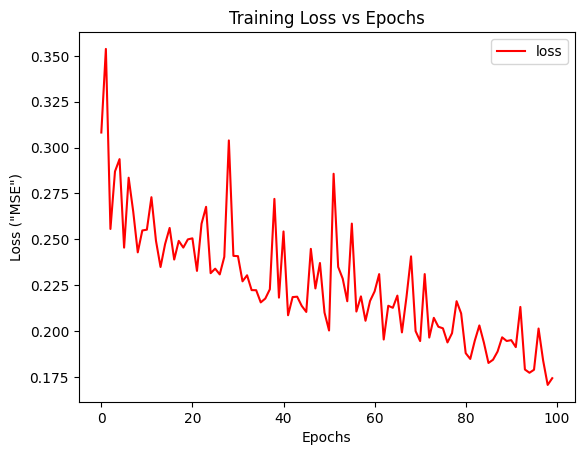

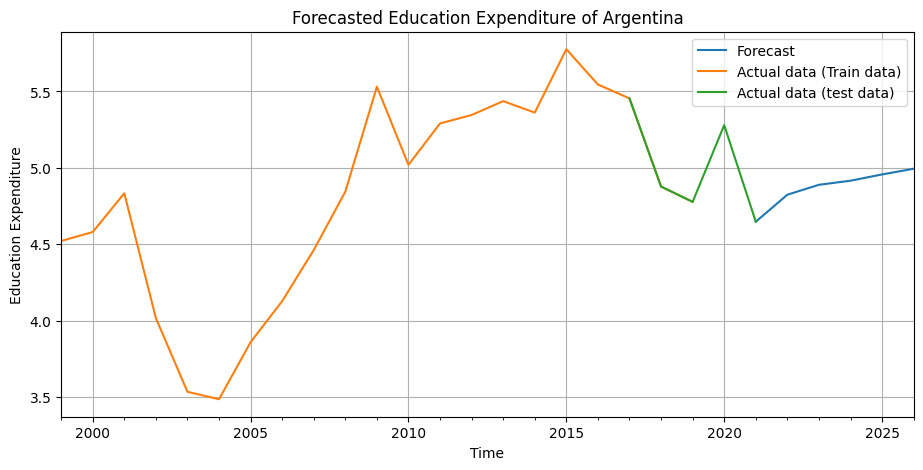



Mean Square Average on test data is: 0.017893454059958458 
Mean Absolute Error on test data is 0.1279713362455368


In [37]:
# generate raw dataset for a selected country
data, train_data, test_data, country_name = get_country('Argentina')

# transform the dataset into useful format for model training
dataset = generate_training_data(train_data)

# train model for 100 epochs and obtain model training logs
model, history = build_model(dataset, 100)

# plot loss vs epochs to monitor the model training process
history.plot(color = 'red', xlabel = 'Epochs', ylabel = 'Loss ("MSE")', title = 'Training Loss vs Epochs')

# generate data for model evaluation and graphical analysis
test_input, test_time =  generate_testing_data(test_data)

# obtain model predictions for model evaluation
test_prediction = model.predict(test_input)
test_prediction = test_prediction[-3:]
test_prediction = pd.Series(test_prediction[:,0], index = test_time[-3:]) #2019 - 2021

_, ax = plt.subplots(figsize = (11,5))
visualize_timeseries((forecast(model, 5, data), train_data, test_data), ax = ax, title = f'Forecasted Education Expenditure of {country_name}', style = ('-', '-', '-'), labels = ['Forecast', 'Actual data (Train data)','Actual data (test data)', 'predicted data (train train)', 'predicted data (test data)'])
print()
print()
# Display model performance metrics

# Initialize the metrics
mse_metric = tf.keras.metrics.MeanSquaredError()
mae_metric = tf.keras.metrics.MeanAbsoluteError()

# Update the state of the metrics with the predictions and the actual values
mse_metric.update_state(test_data.values[2:][:, 0], test_prediction.values)
mae_metric.update_state(test_data.values[2:][:, 0], test_prediction.values)

# Get the results
mse_result = mse_metric.result().numpy()
mae_result = mae_metric.result().numpy()



print(f'Mean Square Average on test data is: {mse_result} ')
print(f'Mean Absolute Error on test data is {mae_result}')

# Train Timeseries Models for each Country and Store in a Dictionary

In [132]:
# initialize dictinary to store models
model_dict = dict()

# iterate over the list of all countries
for country in list_of_countries:
    data, train_data, test_data, country_name = get_country(country)
    dataset = generate_training_data(train_data)
    model, history = build_model(dataset, 100)
    
    # set country name as key and model as value
    model_dict[country_name] = model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                40        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
18/18 [==============================] - 1s 13ms/step - loss: 6.2040
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 2.5822
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 0.8215
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 0.3

# Display and Plot Education Expenditure Forecasts for Any Given Country

In [38]:
print('List of Available Governments/Countries: ')
print()
for i in list_of_countries:
    print(i, ',', end=' ')
print()

List of Available Governments/Countries: 

Argentina , Austria , Switzerland , Cote d'Ivoire , Cyprus , Denmark , Spain , Finland , United Kingdom , Greece , Italy , Japan , Madagascar , Mauritius , Netherlands , Norway , Portugal , Sweden , Thailand , 


In [40]:
plot_forecast('Argentina', 10)

KeyError: 'Argentina'

In [41]:
country

NameError: name 'country' is not defined